📂 Lade Datei von: /Users/dancingfoxstudio/Desktop/SF/customer_behavour/Ecommerce_Consumer_Behavior_Analysis_Data.csv


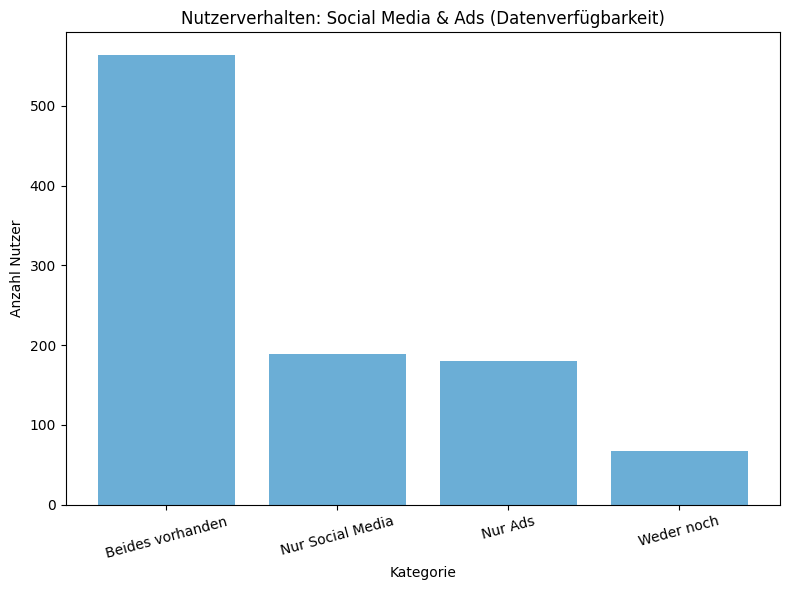

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6411456033810683
            Iterations: 93
            Function evaluations: 93
            Gradient evaluations: 93
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6379014211870787
            Iterations: 67
            Function evaluations: 67
            Gradient evaluations: 67
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5989319224014198
            Iterations: 79
            Function evaluations: 79
            Gradient evaluations: 79
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6086818991084594
            Iterations: 67
            Function evaluations: 68
            Gradient evaluations: 67
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.615888530529167
            Iterations: 77
            Function eval

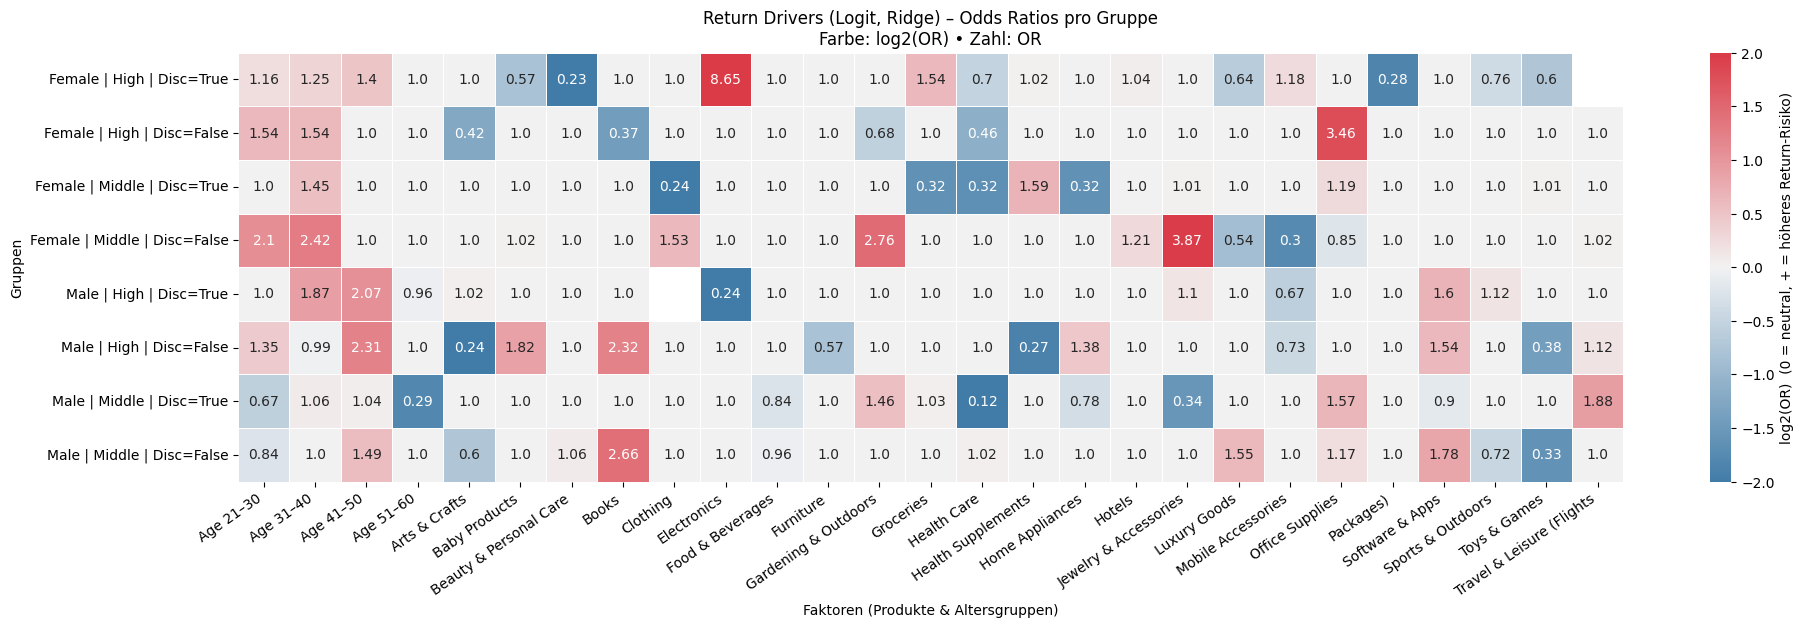


Top-5 High-Risk-Kategorien (Female | High | Disc=True | Age 31–40):
   Gender Income_Label  Discount_Used Age_Group   Purchase_Category  \
0  Female         High           True     31–40               Books   
1  Female         High           True     31–40         Electronics   
2  Female         High           True     31–40           Groceries   
3  Female         High           True     31–40  Health Supplements   
4  Female         High           True     31–40         Animal Feed   

   total_purchases  total_returns  Return_%  
0                2              2     100.0  
1                2              2     100.0  
2                2              2     100.0  
3                2              2     100.0  
4                1              1     100.0  

Pivot (Female | High | Disc=True):
Purchase_Category  Animal Feed  Arts & Crafts  Baby Products  \
Age_Group                                                      
21–30                      NaN          100.0            0.0   


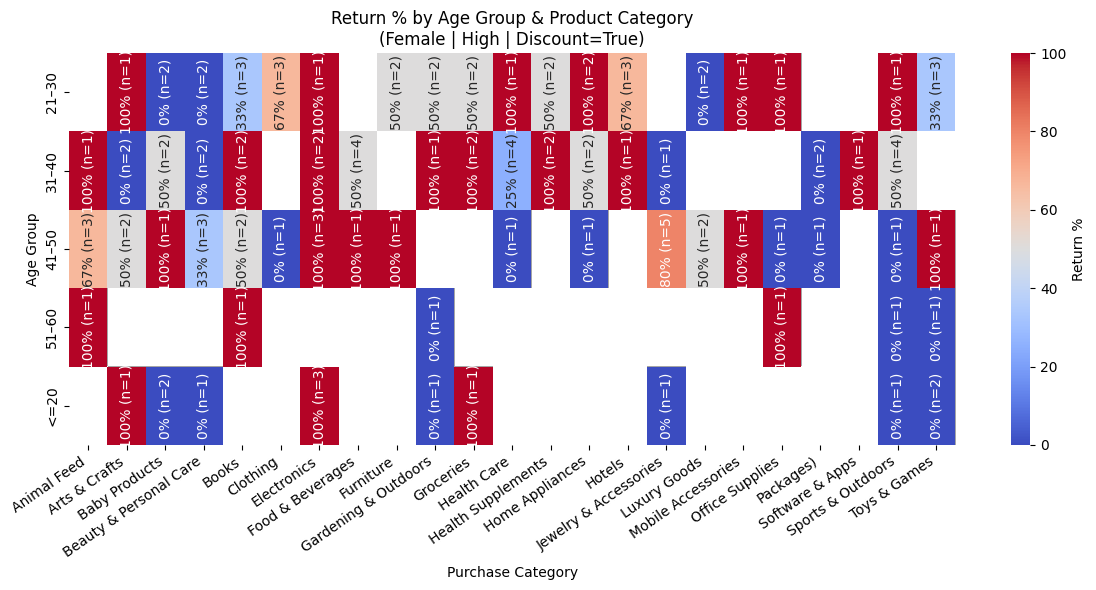

In [1]:
from data_loader import load_and_clean_data
from visualisation import (
    plot_interaction_overview,
    plot_segment_heatmap,
    plot_return_logit_summary,
)
from Return import (
    collect_odds_ratios,
    build_return_rate_lookup,
    save_return_rate_lookup,
    get_topk_categories,
    pivot_segment_age_product,
    summarize_segments,
)


def main():
    # 1) Daten laden
    df = load_and_clean_data()

    # 2) Überblick zu Social/Ads (Datenverfügbarkeit)
    plot_interaction_overview(df)

    # 3) Logit (Ridge) laufen lassen und OR-Heatmap zeichnen
    or_df = collect_odds_ratios(df, alpha=0.8)
    plot_return_logit_summary(or_df)

    # 4) Lookup-Tabelle bauen und speichern (CSV)
    lookup = build_return_rate_lookup(df)
    save_return_rate_lookup(lookup, "artifacts/return_rate_lookup.csv")

    # 5) Beispiele
    # 5a) Top-5 High-Risk-Kategorien für Female | High | Disc=True in Age 31–40
    top5 = get_topk_categories(
        lookup,
        gender="Female",
        income_label="High",
        discount_used=True,
        age_group="31–40",
        k=5,
        ascending=False,
    )
    print("\nTop-5 High-Risk-Kategorien (Female | High | Disc=True | Age 31–40):")
    print(top5)

    # 5b) Pivot je Age_Group → Product (für eine saubere Heatmap)
    pivot = pivot_segment_age_product(
        lookup, gender="Female", income_label="High", discount_used=True
    )
    print("\nPivot (Female | High | Disc=True):")
    print(pivot.round(1))

    # 5c) Segment-Zusammenfassung
    summary = summarize_segments(lookup)
    print("\nSegment-Zusammenfassung:")
    print(summary.round(1))

    # 5d) Globale Top-10 (nur Male/Female): sortiert nach Return_% ↓, dann total_purchases ↓
    cols = [
        "Gender", "Income_Label", "Discount_Used", "Age_Group",
        "Purchase_Category", "total_purchases", "total_returns", "Return_%"
    ]
    global_top10 = (
        lookup[lookup["Gender"].isin(["Male", "Female"])][cols]
        .sort_values(["Return_%", "total_purchases"], ascending=[False, False])
        .head(10)
        .reset_index(drop=True)
    )
    print("\nGlobale Top-10 Kategorien (nur Male/Female, nach Return_% und Käufen):")
    print(global_top10)

    # 6) (Optional) Segment-Heatmap mit Count-Overlay direkt rendern
    plot_segment_heatmap(
        lookup,
        gender="Female",
        income_label="High",
        discount_used=True,
        low_base_threshold=3,   # Optionaler Hinweis für kleine Basen
        fade_low_base=True
    )


if __name__ == "__main__":
    main() 